## RNN(순환 신경망)
- LSTM (Long Short Term Memory)

#### LSTM 을 이용한 로이터 뉴스 카테고리 분류하기

In [2]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words = 1000, test_split = 0.2)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
import numpy as np

category = np.max(y_train) + 1
print(category, "카테고리")
print(len(X_train), "학습용 뉴스 기사" )
print(len(X_test), "테스트용 뉴스 기사" )
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import reuters

import numpy as np
import matplotlib.pyplot as plt


(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words = 1000, test_split = 0.2)

category = np.max(y_train) + 1
print(category, "카테고리")
print(len(X_train), "학습용 뉴스 기사" )
print(len(X_test), "테스트용 뉴스 기사" )
print(X_train[0])

# 단어의 수 맞추기
X_train = sequence.pad_sequences(X_train, maxlen = 100)
X_test = sequence.pad_sequences(X_test, maxlen = 100)

# 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 모델 구조 설정
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation= 'tanh'))
model.add(Dense(46, activation='softmax'))

model.compile(loss= 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 5)

history = model.fit(X_train, y_train, batch_size = 50, epochs = 200, validation_data = (X_test, y_test), callbacks = [early_stopping_callback])

model.summary()

print("\nTest Accuaracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
Epoch 1/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - acc: 0.3487 - loss: 2.6929 - val_acc: 0.5009 - val_loss: 2.0353
Epoch 2/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - acc: 0.5057 - loss: 1.9854 - val_acc: 0.5378 - val_loss: 1.8298
Epoch 3/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - acc: 0.5530 - loss: 1.7509 - val_acc: 0.5815 - val_loss: 1.6778
Epoch 4/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - acc: 0.5827 - loss: 1.6602 - val_acc: 0.5726 - val_loss: 1.8828
Epoch 5/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - acc: 0.6065 - loss: 1.5693 - val_acc: 0.6193 - val_loss: 1.5063
Epoch 6/2

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)        │ (None, 100, 100)       │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 46)             │         4,646 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 555,140 (2.12 MB)

 Trainable params: 185,046 (722.84 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 370,094 (1.41 MB)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.7315 - loss: 1.1814

Test Accuaracy: 0.7262


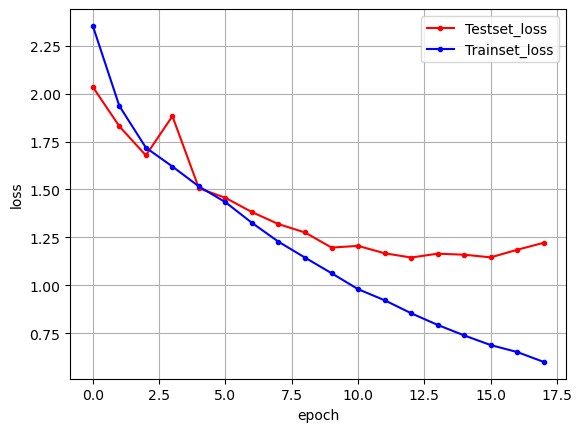

In [28]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c='red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c='blue', label = 'Trainset_loss')

plt.legend(loc= 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#### LSTM & CNN 조합을 이용한 영화 리뷰 분류하기

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Conv1D, MaxPooling1D, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import imdb

import numpy as np
import matplotlib.pyplot as plt


(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 5000)

# 단어의 수 맞추기
X_train = sequence.pad_sequences(X_train, maxlen = 500)
X_test = sequence.pad_sequences(X_test, maxlen = 500)

# 모델 구조 설정
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides = 1))
model.add(MaxPooling1D(pool_size =4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['acc'])

early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 3)

history = model.fit(X_train, y_train, batch_size = 40, epochs = 100, validation_data = (X_test, y_test), callbacks = [early_stopping_callback])

model.summary()

print("\nTest Accuaracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 69ms/step - acc: 0.7264 - loss: 0.4905 - val_acc: 0.8892 - val_loss: 0.2719
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - acc: 0.9133 - loss: 0.2225 - val_acc: 0.8899 - val_loss: 0.2637
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - acc: 0.9326 - loss: 0.1786 - val_acc: 0.8913 - val_loss: 0.2705
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - acc: 0.9506 - loss: 0.1410 - val_acc: 0.8908 - val_loss: 0.2867
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - acc: 0.9636 - loss: 0.1077 - val_acc: 0.8878 - val_loss: 0.3082


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)        │ (40, 500, 100)         │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (40, 500, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (40, 496, 64)          │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (40, 124, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (40, 55)               │        26,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (40, 1)                │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (40, 1)                │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,675,562 (6.39 MB)

 Trainable params: 558,520 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,117,042 (4.26 MB)

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - acc: 0.8873 - loss: 0.3100

Test Accuaracy: 0.8878


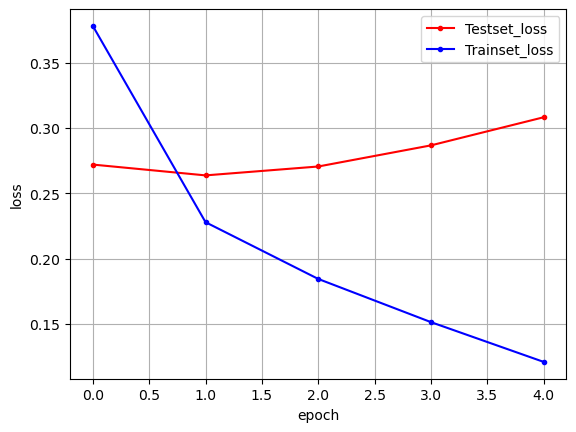

In [33]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c='red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c='blue', label = 'Trainset_loss')

plt.legend(loc= 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#### attention 부분 추가
- 기존 RNN 구조에서 가중치가 맨 뒤쪽에 부여되어 있는 것을 방지하기 위해 Attention 모델 추가

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Conv1D, MaxPooling1D, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import imdb
from attention import Attention

import numpy as np
import matplotlib.pyplot as plt


(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 5000)

# 단어의 수 맞추기
X_train = sequence.pad_sequences(X_train, maxlen = 500)
X_test = sequence.pad_sequences(X_test, maxlen = 500)

# 모델 구조 설정
model = Sequential()
model.add(Embedding(5000, 500))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True))
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['acc'])

early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 3)

history = model.fit(X_train, y_train, batch_size = 40, epochs = 100, validation_data = (X_test, y_test), callbacks = [early_stopping_callback])

# model.summary()

# print("\nTest Accuaracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/100


ValueError: Only input tensors may be passed as positional arguments. The following argument value should be passed as a keyword argument: None (of type <class 'NoneType'>)

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c='red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c='blue', label = 'Trainset_loss')

plt.legend(loc= 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()